In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import re
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ML_TABLE = pd.read_csv('/content/ML_TABLE.csv')
ML_TABLE2 = pd.read_csv('/content/ML_TABLE2.csv')


ML_TABLE = pd.concat([ML_TABLE, ML_TABLE2], ignore_index=True)

ML_TABLE = ML_TABLE.sort_values('Number of Vehicles', ascending=False)

# Drop duplicate rows based on all columns
ML_TABLE.drop_duplicates(inplace=True)
# Reset the index of the DataFrame after removing duplicates
ML_TABLE.reset_index(drop=True, inplace=True)

ML_TABLE.fillna(0, inplace=True)

ML_TABLE

,County,Number of Vehicles,Total Chargers,GDP,Population,Land Area,Population Density
0,Los Angeles,581479.0,60698.0,801967353,9606925,4060,2366
1,Orange,263287.0,8522.0,273063592,3121138,793,3935
2,Santa Clara,223206.0,23365.0,390234709,1876849,1291,1453
3,San Diego,175122.0,10982.0,261671687,3262770,4210,775
4,Alameda,134796.0,6478.0,150532046,1616117,737,2192
...,...,...,...,...,...,...,...
474,Osceola,0.0,0.0,14415205,453025,1328,341
475,Lafayette,0.0,0.0,210912,8379,543,15
476,Hamilton,0.0,0.0,588042,13748,514,26
477,Throckmorton,0.0,0.0,160434,1513,913,1


In [ ]:
# Example: Select rows by index
ML_TABLE_selected_rows = ML_TABLE.loc[[0, 1, 2, 3, 4, 474, 475, 476, 477, 478]]
ML_TABLE_selected_rows = ML_TABLE_selected_rows.to_latex(index=False, escape=False, column_format='||c c c c c c c||', caption='Table Used for Machine Learning Models')
print(ML_TABLE_selected_rows)

\begin{table}
\caption{Table Used for Machine Learning Models}
\begin{tabular}{||c c c c c c c||}
\toprule
County & Number of Vehicles & Total Chargers & GDP & Population & Land Area & Population Density \\
\midrule
Los Angeles & 581479.000000 & 60698.000000 & 801967353 & 9606925 & 4060 & 2366 \\
Orange & 263287.000000 & 8522.000000 & 273063592 & 3121138 & 793 & 3935 \\
Santa Clara & 223206.000000 & 23365.000000 & 390234709 & 1876849 & 1291 & 1453 \\
San Diego & 175122.000000 & 10982.000000 & 261671687 & 3262770 & 4210 & 775 \\
Alameda & 134796.000000 & 6478.000000 & 150532046 & 1616117 & 737 & 2192 \\
Osceola & 0.000000 & 0.000000 & 14415205 & 453025 & 1328 & 341 \\
Lafayette & 0.000000 & 0.000000 & 210912 & 8379 & 543 & 15 \\
Hamilton & 0.000000 & 0.000000 & 588042 & 13748 & 514 & 26 \\
Throckmorton & 0.000000 & 0.000000 & 160434 & 1513 & 913 & 1 \\
St. Lawrence & 0.000000 & 0.000000 & 4847243 & 106791 & 2680 & 39 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
# Check for duplicate values in the 'County' column

duplicate_counties = ML_TABLE[ML_TABLE['County'].duplicated(keep=False)]


# Display the duplicate counties

duplicate_counties

,County,Number of Vehicles,Total Chargers,GDP,Population,Land Area,Population Density
1,Orange,263287.0,8522.0,273063592,3121138,793,3935
17,Nassau,24787.0,262.0,100089673,1378136,285,4835
34,Kings,11373.0,717.0,110580419,2532919,69,36708
38,Montgomery,8465.0,144.0,37046507,743154,1042,713
43,Monroe,6575.0,897.0,48916577,746077,657,1135
...,...,...,...,...,...,...,...
454,Columbia,0.0,0.0,333032,3949,869,4
458,Franklin,0.0,0.0,3925358,97150,1242,80
459,Lewis,0.0,0.0,3423053,82553,2403,36
462,Mason,0.0,0.0,1587194,66034,960,71


Mean Squared Error: 6762762.001550451
Root Mean Squared Error: 2600.5310999006438
R^2 Score: 0.8412275877751303
Mean Absolute Error: 1069.6483783721924
Accuracy (within 1000 vehicles): 89.58%
Spearman Correlation: 0.9317447941342898
P-value: 7.236146228435009e-22


<Figure size 1000x600 with 0 Axes>

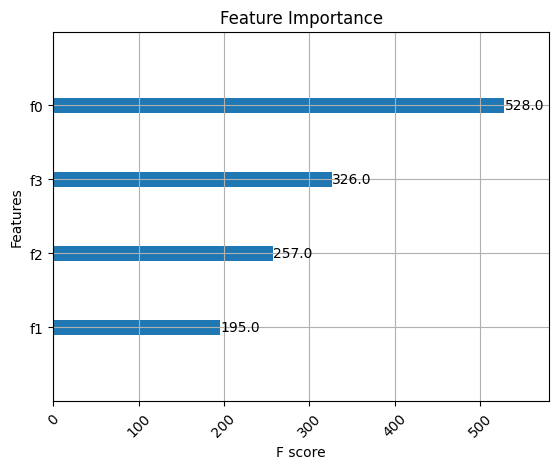

              Feature  Importance
3      Total Chargers    0.969198
0                 GDP    0.022525
2  Population Density    0.005625
1          Population    0.002651


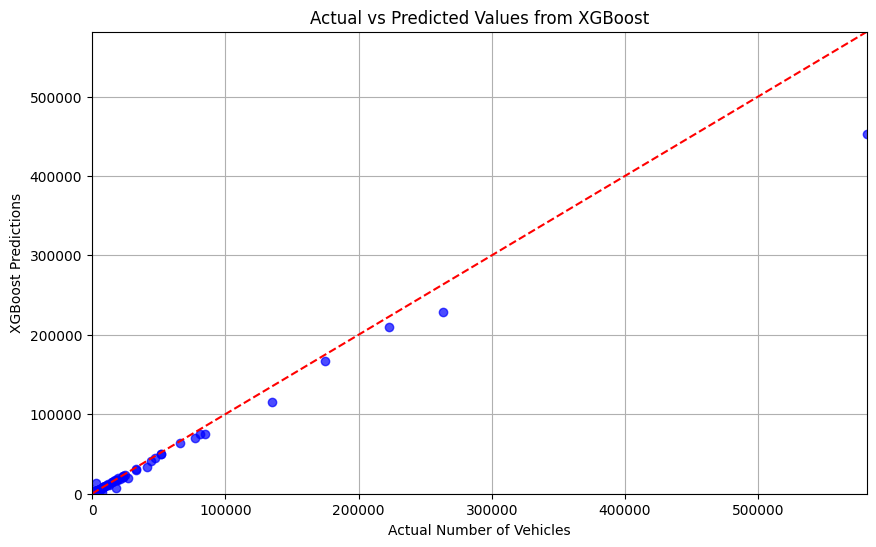

,County,Actual Number of Vehicles,XGBoost Predictions
0,Los Angeles,581479.0,452959.031250
1,Orange,263287.0,229097.078125
2,Santa Clara,223206.0,210048.109375
3,San Diego,175122.0,167153.906250
4,Alameda,134796.0,115334.390625
...,...,...,...
474,Osceola,0.0,459.957214
475,Lafayette,0.0,274.357239
476,Hamilton,0.0,274.357239
477,Throckmorton,0.0,274.357239


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Load data
X = ML_TABLE[['GDP', 'Population', 'Population Density', 'Total Chargers']]
y = ML_TABLE['Number of Vehicles']

# Scale features (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=3)

# Create and fit the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=30, learning_rate=0.1, max_depth=100, random_state=3)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

# Calculate accuracy as the percentage of predictions within a certain tolerance
tolerance = 1000
accuracy = np.mean(np.abs(y_pred - y_test) <= tolerance) * 100

print(f'Accuracy (within {tolerance} vehicles): {accuracy:.2f}%')

# Predict car counts for the entire dataset
xgboost_car_counts = xgb_model.predict(X_scaled)

# New DataFrame for predictions
ML_PREDICTIONS = pd.DataFrame({
    'County': ML_TABLE['County'],  # Assuming 'County' is a column in ML_TABLE
    'Actual Number of Vehicles': y,
    'XGBoost Predictions': xgboost_car_counts
})

# Spearman's rank correlation test
spearman_corr, p_value = spearmanr(y_test, y_pred)

print(f'Spearman Correlation: {spearman_corr}')
print(f'P-value: {p_value}')

# Calculate feature importances
importance = xgb_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', title='Feature Importance', xlabel='F score', ylabel='Features')
plt.xticks(rotation=45)
plt.show()

# Display the feature importances DataFrame
print(importance_df)

# Plot actual vs predicted values from ML_PREDICTIONS
plt.figure(figsize=(10, 6))
plt.scatter(ML_PREDICTIONS['Actual Number of Vehicles'], ML_PREDICTIONS['XGBoost Predictions'], alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Values from XGBoost')
plt.xlabel('Actual Number of Vehicles')
plt.ylabel('XGBoost Predictions')
plt.xlim([y.min() - 100, y.max() + 100])
plt.ylim([y.min() - 100, y.max() + 100])
plt.grid()
plt.show()

ML_PREDICTIONS

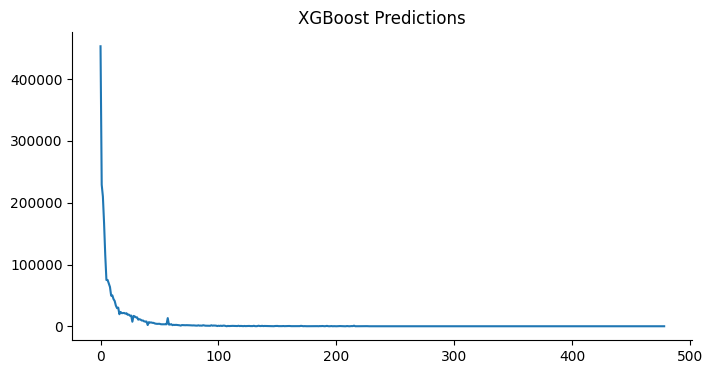

In [ ]:
# @title XGBoost Predictions

from matplotlib import pyplot as plt
ML_PREDICTIONS['XGBoost Predictions'].plot(kind='line', figsize=(8, 4), title='XGBoost Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

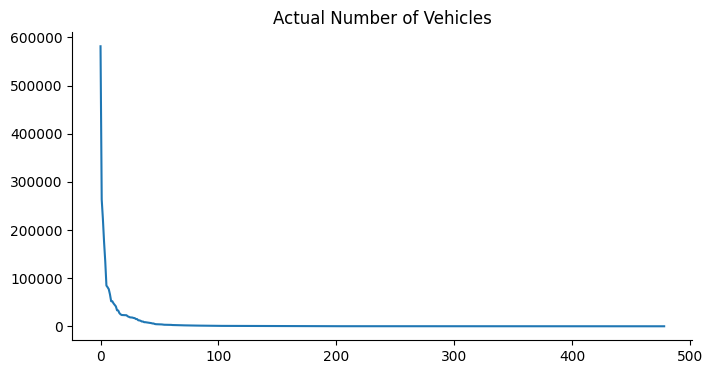

In [ ]:
# @title Actual Number of Vehicles

from matplotlib import pyplot as plt
ML_PREDICTIONS['Actual Number of Vehicles'].plot(kind='line', figsize=(8, 4), title='Actual Number of Vehicles')
plt.gca().spines[['top', 'right']].set_visible(False)

Mean Squared Error: 11255710.826041667
Root Mean Squared Error: 3354.953177920918
Mean Absolute Error: 1110.4604166666668
R-squared: 0.8173576170139816
Accuracy (within 1000 vehicles): 84.38%
Spearman Correlation: 0.920875466612781
P-value: 3.1210485856482566e-40


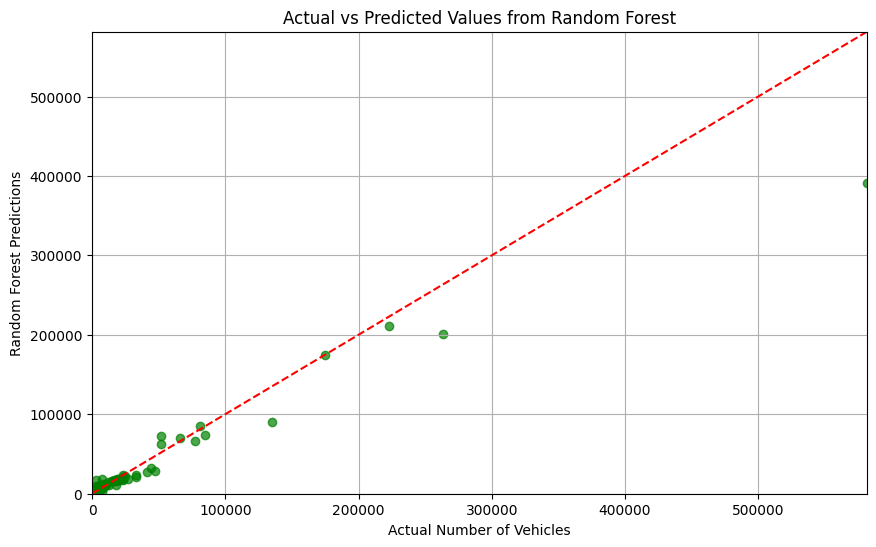

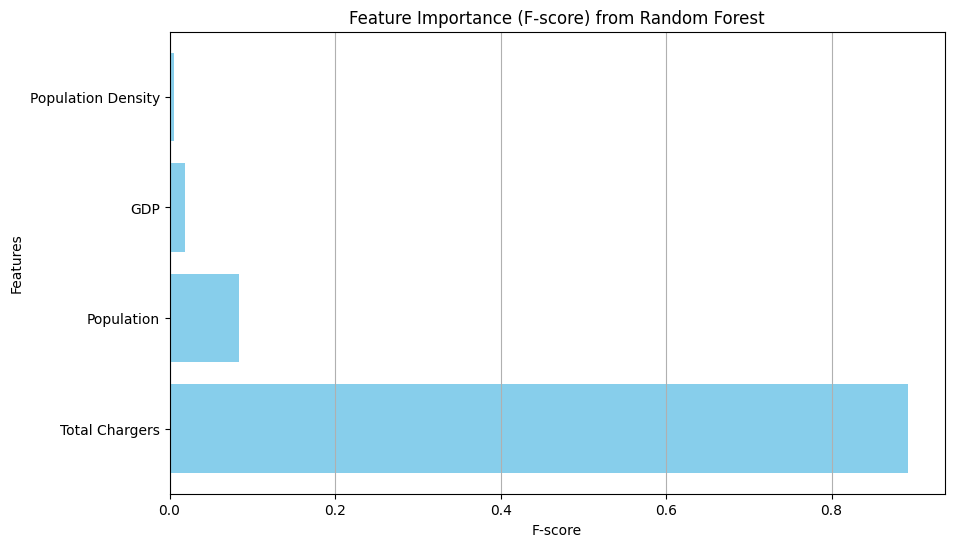

              Feature  Importance
0      Total Chargers    0.891831
2          Population    0.083599
1                 GDP    0.019159
3  Population Density    0.005412


,County,Actual Number of Vehicles,Random Forest Predictions
0,Los Angeles,581479.0,391334.8
1,Orange,263287.0,200390.3
2,Santa Clara,223206.0,210807.4
3,San Diego,175122.0,174531.4
4,Alameda,134796.0,89909.0
...,...,...,...
474,Osceola,0.0,40.9
475,Lafayette,0.0,2.9
476,Hamilton,0.0,2.3
477,Throckmorton,0.0,0.1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Assuming ML_TABLE is already defined and contains your data

# Select features and target variable
X = ML_TABLE[['Total Chargers', 'GDP', 'Population', 'Population Density']]
y = ML_TABLE['Number of Vehicles']  # Assuming we want to predict the number of vehicles

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=10, random_state=3)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Calculate accuracy as the percentage of predictions within a certain tolerance
tolerance = 1000
accuracy = np.mean(np.abs(y_pred - y_test) <= tolerance) * 100
print(f'Accuracy (within {tolerance} vehicles): {accuracy:.2f}%')

# Spearman's rank correlation test
spearman_corr, p_value = spearmanr(y_test, y_pred)
print(f'Spearman Correlation: {spearman_corr}')
print(f'P-value: {p_value}')

# Predict car counts for the entire dataset
random_forest_car_counts = model.predict(X)

# Create a separate DataFrame for the entire dataset predictions
all_random_forest_predictions = pd.DataFrame({
    'County': ML_TABLE['County'],  # Assuming 'County' is a column in ML_TABLE
    'Actual Number of Vehicles': y,
    'Random Forest Predictions': random_forest_car_counts
})

# Plot actual vs predicted values from Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(all_random_forest_predictions['Actual Number of Vehicles'],
            all_random_forest_predictions['Random Forest Predictions'],
            alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Values from Random Forest')
plt.xlabel('Actual Number of Vehicles')
plt.ylabel('Random Forest Predictions')
plt.xlim([y.min() - 100, y.max() + 100])
plt.ylim([y.min() - 100, y.max() + 100])
plt.grid()
plt.show()

# Calculate feature importances (F-score)
importance = model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importances using F-score
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance (F-score) from Random Forest')
plt.xlabel('F-score')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()

# Display the feature importances DataFrame
print(importance_df)

all_random_forest_predictions

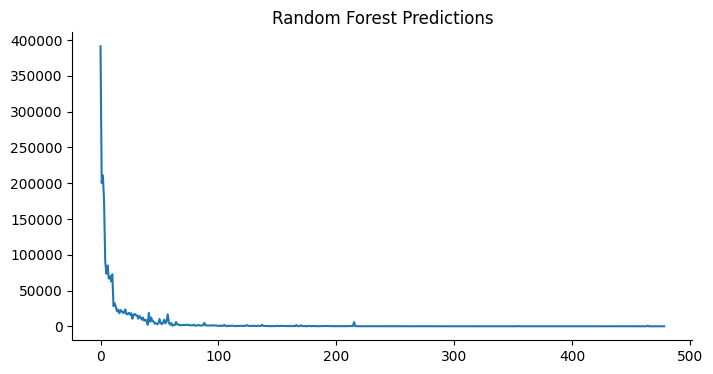

In [ ]:
# @title Random Forest Predictions

from matplotlib import pyplot as plt
all_random_forest_predictions['Random Forest Predictions'].plot(kind='line', figsize=(8, 4), title='Random Forest Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

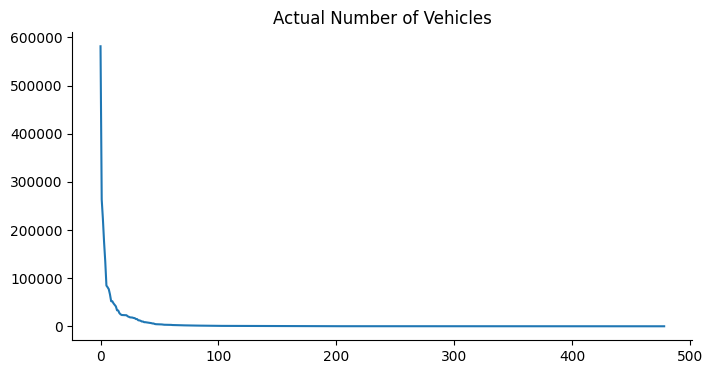

In [ ]:
# @title Actual Number of Vehicles

from matplotlib import pyplot as plt
all_random_forest_predictions['Actual Number of Vehicles'].plot(kind='line', figsize=(8, 4), title='Actual Number of Vehicles')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Merge based on index
ML_PREDICTIONS = pd.merge(all_random_forest_predictions, ML_PREDICTIONS, left_index=True, right_index=True)

ML_PREDICTIONS = ML_PREDICTIONS.drop(columns=['Actual Number of Vehicles_y', 'County_y'])
ML_PREDICTIONS.rename(columns={'County_x': 'County', 'Actual Number of Vehicles_x': 'Actual Number of Vehicles'}, inplace=True)

ML_PREDICTIONS

,County,Actual Number of Vehicles,Random Forest Predictions,XGBoost Predictions
0,Los Angeles,581479.0,391334.8,452959.031250
1,Orange,263287.0,200390.3,229097.078125
2,Santa Clara,223206.0,210807.4,210048.109375
3,San Diego,175122.0,174531.4,167153.906250
4,Alameda,134796.0,89909.0,115334.390625
...,...,...,...,...
474,Osceola,0.0,40.9,459.957214
475,Lafayette,0.0,2.9,274.357239
476,Hamilton,0.0,2.3,274.357239
477,Throckmorton,0.0,0.1,274.357239


Mean Squared Error: 673757039.8495564
Root Mean Squared Error: 25956.83031206924
R^2 Score: 0.8198681457209664
Mean Absolute Error: 5544.774406140594
Accuracy (within 1000 vehicles): 51.04%
Spearman Correlation: 0.8411145314785956
P-value: 7.893488533281676e-27


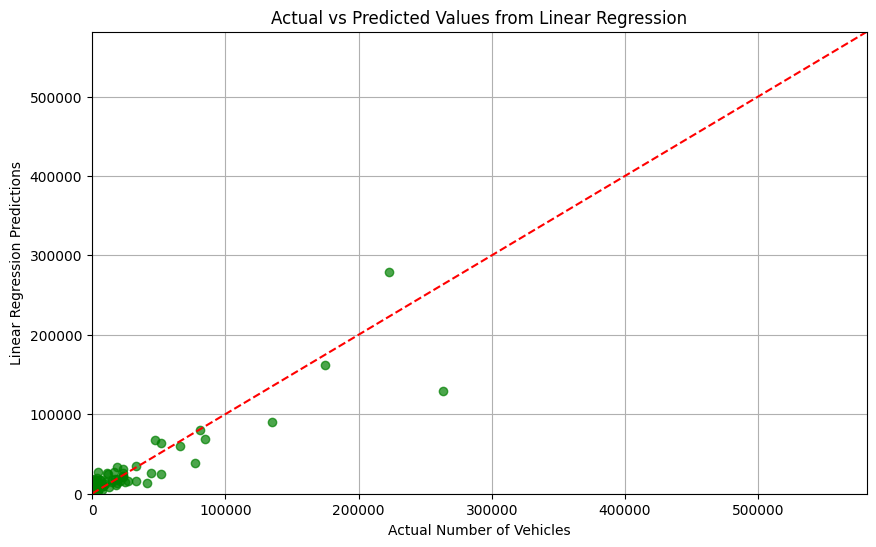

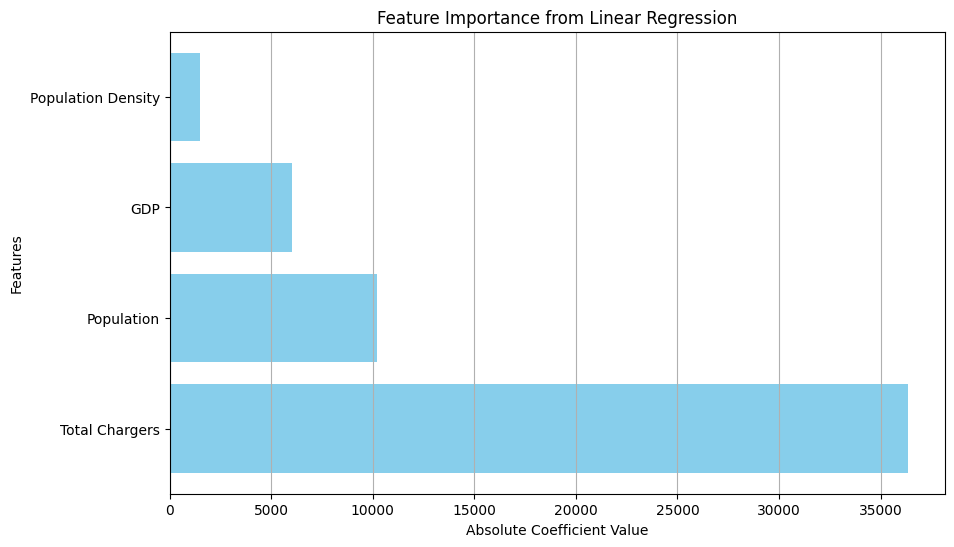

              Feature   Coefficient
0      Total Chargers  36330.773968
2          Population  10201.080051
1                 GDP   6017.124235
3  Population Density   1516.667227


,County,Actual Number of Vehicles,Linear Regression Predictions
0,Los Angeles,581479.0,811758.537930
1,Orange,263287.0,128862.898084
2,Santa Clara,223206.0,279084.724571
3,San Diego,175122.0,161914.665762
4,Alameda,134796.0,89973.150585
...,...,...,...
474,Osceola,0.0,4779.864826
475,Lafayette,0.0,-979.208928
476,Hamilton,0.0,-924.714179
477,Throckmorton,0.0,-1074.996975


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Features and target variable
X = ML_TABLE[['Total Chargers', 'GDP', 'Population', 'Population Density']]

# Target variable
y = ML_TABLE['Number of Vehicles']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=8)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

# Calculate accuracy as the percentage of predictions within a certain tolerance
tolerance = 1000
accuracy = np.mean(np.abs(y_pred - y_test) <= tolerance) * 100
print(f'Accuracy (within {tolerance} vehicles): {accuracy:.2f}%')

# Spearman's rank correlation test
spearman_corr, p_value = spearmanr(y_test, y_pred)
print(f'Spearman Correlation: {spearman_corr}')
print(f'P-value: {p_value}')

# Predict car counts for the entire dataset
predictions = model.predict(X_scaled)

# Create a separate DataFrame for the entire dataset predictions
linear_regression_predictions = pd.DataFrame({
    'County': ML_TABLE['County'],  # Assuming 'County' is a column in ML_TABLE
    'Actual Number of Vehicles': y.values,
    'Linear Regression Predictions': predictions
})

# Plot actual vs predicted values from Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(linear_regression_predictions['Actual Number of Vehicles'],
            linear_regression_predictions['Linear Regression Predictions'],
            alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Values from Linear Regression')
plt.xlabel('Actual Number of Vehicles')
plt.ylabel('Linear Regression Predictions')
plt.xlim([y.min() - 100, y.max() + 100])
plt.ylim([y.min() - 100, y.max() + 100])
plt.grid()
plt.show()

# Calculate feature importances based on coefficients
Coefficient = np.abs(model.coef_)

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': Coefficient
}).sort_values(by='Coefficient', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.title('Feature Importance from Linear Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()

# Display the feature importances DataFrame
print(importance_df)

linear_regression_predictions

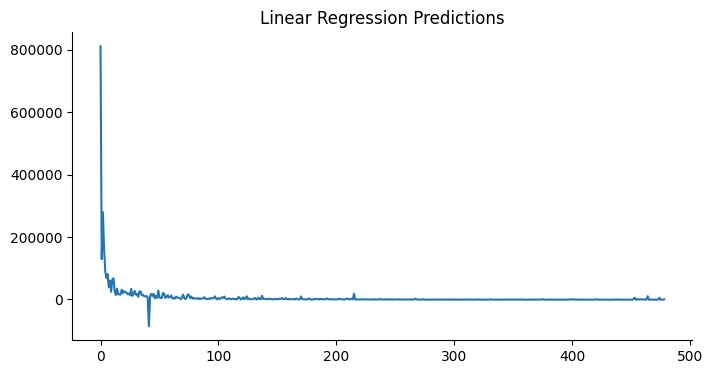

In [ ]:
# @title Linear Regression Predictions

from matplotlib import pyplot as plt
linear_regression_predictions['Linear Regression Predictions'].plot(kind='line', figsize=(8, 4), title='Linear Regression Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

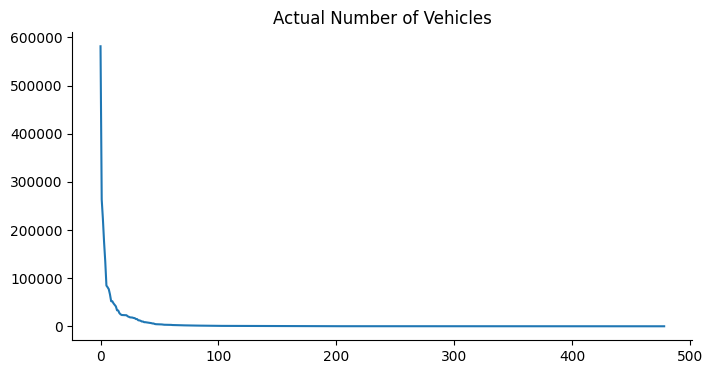

In [ ]:
# @title Actual Number of Vehicles

from matplotlib import pyplot as plt
linear_regression_predictions['Actual Number of Vehicles'].plot(kind='line', figsize=(8, 4), title='Actual Number of Vehicles')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Merge based on index
ML_PREDICTIONS = pd.merge(linear_regression_predictions, ML_PREDICTIONS, left_index=True, right_index=True)

ML_PREDICTIONS = ML_PREDICTIONS.drop(columns=['Actual Number of Vehicles_y', 'County_y'])
ML_PREDICTIONS.rename(columns={'County_x': 'County', 'Actual Number of Vehicles_x': 'Actual Number of Vehicles'}, inplace=True)

ML_PREDICTIONS

,County,Actual Number of Vehicles,Linear Regression Predictions,Random Forest Predictions,XGBoost Predictions
0,Los Angeles,581479.0,811758.537930,391334.8,452959.031250
1,Orange,263287.0,128862.898084,200390.3,229097.078125
2,Santa Clara,223206.0,279084.724571,210807.4,210048.109375
3,San Diego,175122.0,161914.665762,174531.4,167153.906250
4,Alameda,134796.0,89973.150585,89909.0,115334.390625
...,...,...,...,...,...
474,Osceola,0.0,4779.864826,40.9,459.957214
475,Lafayette,0.0,-979.208928,2.9,274.357239
476,Hamilton,0.0,-924.714179,2.3,274.357239
477,Throckmorton,0.0,-1074.996975,0.1,274.357239


Mean Squared Error: 254617475.00050148
R^2 Score: -0.009837895924293294
Mean Absolute Error: 3636.1636209948692
Accuracy (within 1000 vehicles): 79.17%
Spearman Correlation: 0.8407441079044898
P-value: 3.481826613541246e-78


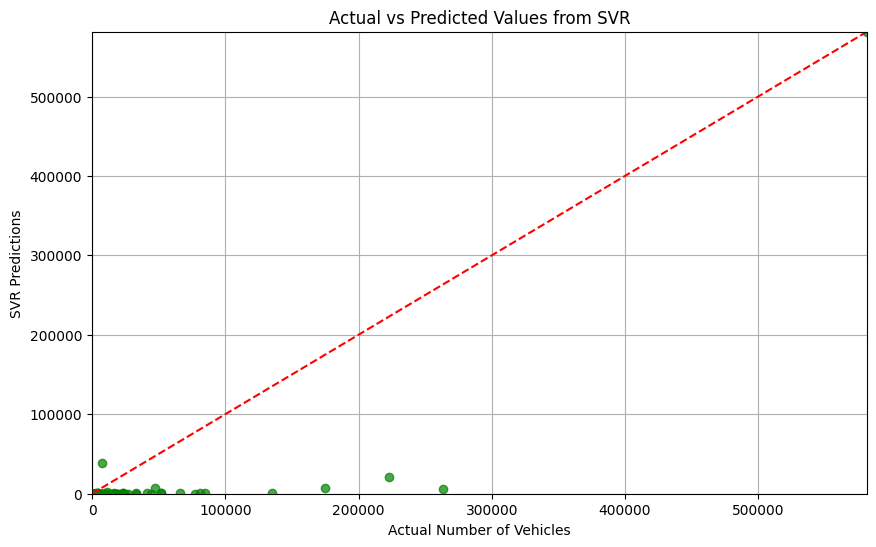

,County,Actual Number of Vehicles,SVR Predictions
0,Los Angeles,581479.0,581478.890858
1,Orange,263287.0,5323.707495
2,Santa Clara,223206.0,21225.885002
3,San Diego,175122.0,7500.590755
4,Alameda,134796.0,1125.320610
...,...,...,...
474,Osceola,0.0,70.693169
475,Lafayette,0.0,68.815845
476,Hamilton,0.0,68.903998
477,Throckmorton,0.0,68.723105


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Features and target variable
X = ML_TABLE[['Total Chargers', 'GDP', 'Population', 'Population Density']]

# Target variable
y = ML_TABLE['Number of Vehicles']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.6, random_state=3)

# Initialize the SVR model
model = SVR(kernel='poly')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

# Calculate accuracy as the percentage of predictions within a certain tolerance
tolerance = 1000
accuracy = np.mean(np.abs(y_pred - y_test) <= tolerance) * 100
print(f'Accuracy (within {tolerance} vehicles): {accuracy:.2f}%')

# Spearman's rank correlation test
spearman_corr, p_value = spearmanr(y_test, y_pred)
print(f'Spearman Correlation: {spearman_corr}')
print(f'P-value: {p_value}')

# Predict car counts for the entire dataset
predictions = model.predict(X_scaled)

# Create a separate DataFrame for the entire dataset predictions
SVR_predictions = pd.DataFrame({
    'County': ML_TABLE['County'],
    'Actual Number of Vehicles': y.values,
    'SVR Predictions': predictions
})

# Plot actual vs predicted values from SVR
plt.figure(figsize=(10, 6))
plt.scatter(SVR_predictions['Actual Number of Vehicles'],
            SVR_predictions['SVR Predictions'],
            alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Values from SVR')
plt.xlabel('Actual Number of Vehicles')
plt.ylabel('SVR Predictions')
plt.xlim([y.min() - 100, y.max() + 100])
plt.ylim([y.min() - 100, y.max() + 100])
plt.grid()
plt.show()

# Display the predictions DataFrame
SVR_predictions

In [ ]:
# Merge based on index
ML_PREDICTIONS = pd.merge(SVR_predictions, ML_PREDICTIONS, left_index=True, right_index=True)

ML_PREDICTIONS = ML_PREDICTIONS.drop(columns=['Actual Number of Vehicles_y', 'County_y'])
ML_PREDICTIONS.rename(columns={'County_x': 'County', 'Actual Number of Vehicles_x': 'Actual Number of Vehicles'}, inplace=True)

ML_PREDICTIONS

,County,Actual Number of Vehicles,SVR Predictions,Linear Regression Predictions,Random Forest Predictions,XGBoost Predictions
0,Los Angeles,581479.0,581478.890858,811758.537930,391334.8,452959.031250
1,Orange,263287.0,5323.707495,128862.898084,200390.3,229097.078125
2,Santa Clara,223206.0,21225.885002,279084.724571,210807.4,210048.109375
3,San Diego,175122.0,7500.590755,161914.665762,174531.4,167153.906250
4,Alameda,134796.0,1125.320610,89973.150585,89909.0,115334.390625
...,...,...,...,...,...,...
474,Osceola,0.0,70.693169,4779.864826,40.9,459.957214
475,Lafayette,0.0,68.815845,-979.208928,2.9,274.357239
476,Hamilton,0.0,68.903998,-924.714179,2.3,274.357239
477,Throckmorton,0.0,68.723105,-1074.996975,0.1,274.357239


Best Parameters: {'C': 20000, 'epsilon': 1e-06, 'kernel': 'linear'}
Mean Squared Error: 117934217.15809608
Root Mean Squared Error: 10859.752168355228
R^2 Score: 0.5322613198007095
Mean Absolute Error: 2601.22967058695
Accuracy (within 1000 vehicles): 83.33%
Spearman Correlation: 0.8856072639993117
P-value: 2.9256890546290113e-97
Permutation Importances:
              Feature  Importance   Std Dev
0      Total Chargers    0.926756  0.090882
2          Population    0.007604  0.001093
1                 GDP   -0.002969  0.000095
3  Population Density   -0.011504  0.006409


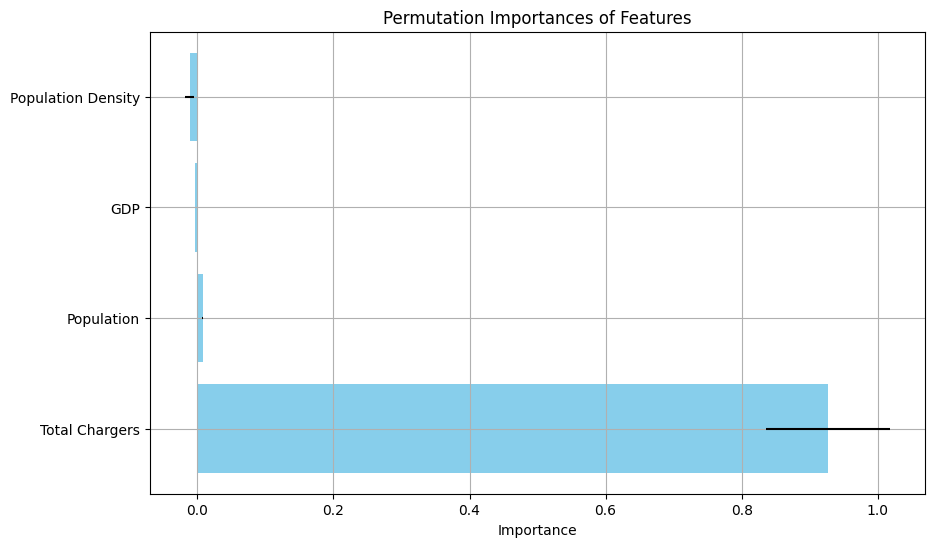

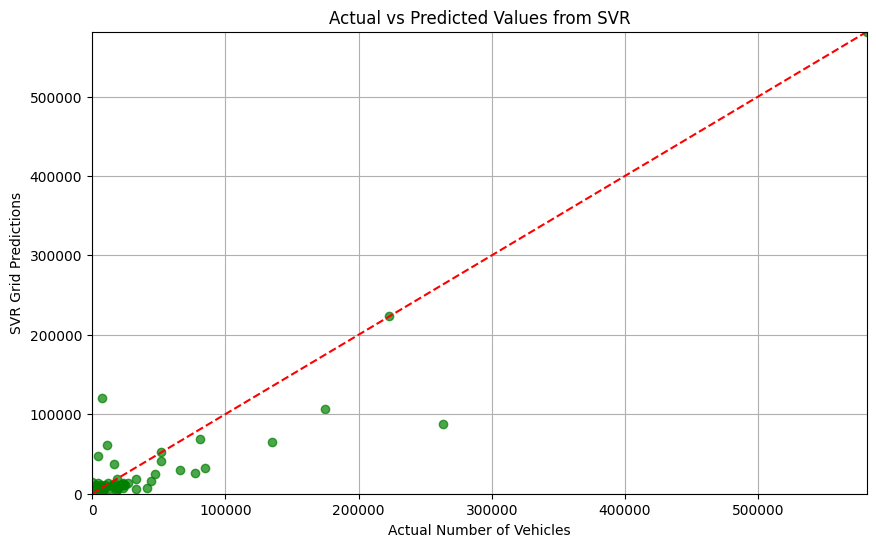

,County,Actual Number of Vehicles,SVR Grid Predictions
0,Los Angeles,581479.0,581478.855536
1,Orange,263287.0,88197.522721
2,Santa Clara,223206.0,223205.948767
3,San Diego,175122.0,106903.096140
4,Alameda,134796.0,65260.852773
...,...,...,...
474,Osceola,0.0,774.264245
475,Lafayette,0.0,-44.972143
476,Hamilton,0.0,-24.868606
477,Throckmorton,0.0,-70.288180


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Features and target variable
X = ML_TABLE[['Total Chargers', 'GDP', 'Population', 'Population Density']]

# Target variable
y = ML_TABLE['Number of Vehicles']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.6, random_state=3)

# Define the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 100, 200, 300, 400, 1000, 20000, 50000, 80000],
    'epsilon': [0.000001, 0.001, 0.1, 0.2, 0.5, 1.0, 5.0, 20.0, 30.0, 70.0],
    'kernel': ['linear', 'poly', 'rbf']
}

# Initialize the SVR model
svr = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model using Grid Search
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

# Calculate accuracy as the percentage of predictions within a certain tolerance
tolerance = 1000
accuracy = np.mean(np.abs(y_pred - y_test) <= tolerance) * 100
print(f'Accuracy (within {tolerance} vehicles): {accuracy:.2f}%')

# Spearman's rank correlation test
spearman_corr, p_value = spearmanr(y_test, y_pred)
print(f'Spearman Correlation: {spearman_corr}')
print(f'P-value: {p_value}')

# Predict car counts for the entire dataset using the best model
predictions = best_model.predict(X_scaled)

# Create a separate DataFrame for the entire dataset predictions
SVR_Grid_predictions = pd.DataFrame({
    'County': ML_TABLE['County'],
    'Actual Number of Vehicles': y.values,
    'SVR Grid Predictions': predictions
})

# Calculate permutation importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for feature importances
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean,
    'Std Dev': result.importances_std
}).sort_values(by='Importance', ascending=False)

# Print the permutation importances
print("Permutation Importances:")
print(perm_importance_df)

# Optional: Plot the permutation importances
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], xerr=perm_importance_df['Std Dev'], color='skyblue')
plt.xlabel('Importance')
plt.title('Permutation Importances of Features')
plt.grid()
plt.show()

# Plot actual vs predicted values from SVR
plt.figure(figsize=(10, 6))
plt.scatter(SVR_Grid_predictions['Actual Number of Vehicles'],
            SVR_Grid_predictions['SVR Grid Predictions'],
            alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Values from SVR')
plt.xlabel('Actual Number of Vehicles')
plt.ylabel('SVR Grid Predictions')
plt.xlim([y.min() - 100, y.max() + 100])
plt.ylim([y.min() - 100, y.max() + 100])
plt.grid()
plt.show()

# Display the predictions DataFrame
SVR_Grid_predictions

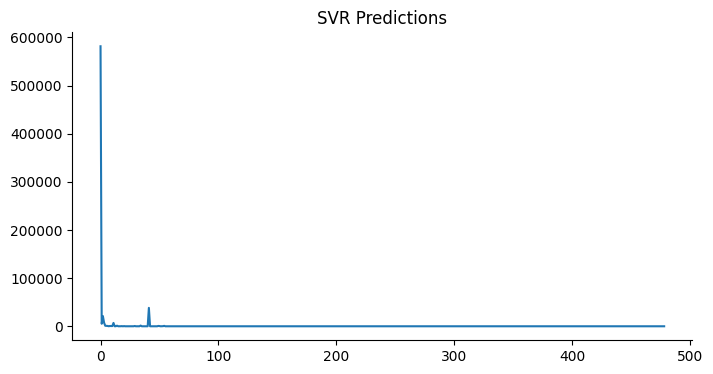

In [ ]:
# @title SVR Predictions

from matplotlib import pyplot as plt
SVR_predictions['SVR Predictions'].plot(kind='line', figsize=(8, 4), title='SVR Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

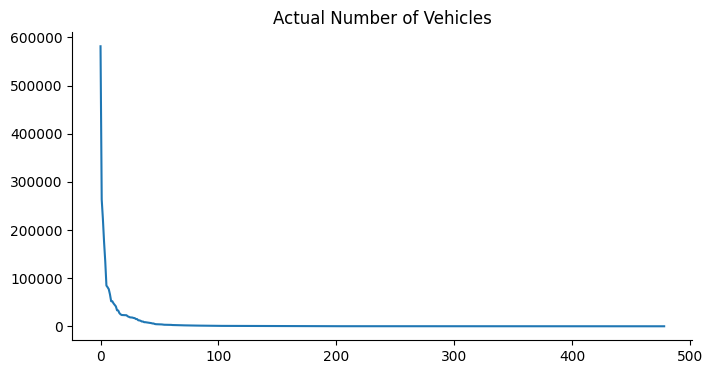

In [ ]:
# @title Actual Number of Vehicles

from matplotlib import pyplot as plt
SVR_predictions['Actual Number of Vehicles'].plot(kind='line', figsize=(8, 4), title='Actual Number of Vehicles')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Merge based on index
ML_PREDICTIONS = pd.merge(SVR_Grid_predictions, ML_PREDICTIONS, left_index=True, right_index=True)

ML_PREDICTIONS = ML_PREDICTIONS.drop(columns=['Actual Number of Vehicles_y', 'County_y'])
ML_PREDICTIONS.rename(columns={'County_x': 'County', 'Actual Number of Vehicles_x': 'Actual Number of Vehicles'}, inplace=True)

ML_PREDICTIONS

,County,Actual Number of Vehicles,SVR Grid Predictions,SVR Predictions,Linear Regression Predictions,Random Forest Predictions,XGBoost Predictions
0,Los Angeles,581479.0,581478.855536,581478.890858,811758.537930,391334.8,452959.031250
1,Orange,263287.0,88197.522721,5323.707495,128862.898084,200390.3,229097.078125
2,Santa Clara,223206.0,223205.948767,21225.885002,279084.724571,210807.4,210048.109375
3,San Diego,175122.0,106903.096140,7500.590755,161914.665762,174531.4,167153.906250
4,Alameda,134796.0,65260.852773,1125.320610,89973.150585,89909.0,115334.390625
...,...,...,...,...,...,...,...
474,Osceola,0.0,774.264245,70.693169,4779.864826,40.9,459.957214
475,Lafayette,0.0,-44.972143,68.815845,-979.208928,2.9,274.357239
476,Hamilton,0.0,-24.868606,68.903998,-924.714179,2.3,274.357239
477,Throckmorton,0.0,-70.288180,68.723105,-1074.996975,0.1,274.357239


In [ ]:
# Example: Select rows by index
ML_PREDICTIONS_selected_rows = ML_PREDICTIONS.loc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 269, 370, 471]]

XGBOOST_selected_rows = ML_PREDICTIONS_selected_rows[['County', 'Actual Number of Vehicles', 'XGBoost Predictions']]

XGBOOST_selected_rows = XGBOOST_selected_rows.to_latex(index=False, escape=False, column_format='||c c c||', caption='XGBoost Prediction Table')
print(XGBOOST_selected_rows)

\begin{table}
\caption{XGBoost Prediction Table}
\begin{tabular}{||c c c||}
\toprule
County & Actual Number of Vehicles & XGBoost Predictions \\
\midrule
Los Angeles & 581479.000000 & 452959.031250 \\
Orange & 263287.000000 & 229097.078125 \\
Santa Clara & 223206.000000 & 210048.109375 \\
San Diego & 175122.000000 & 167153.906250 \\
Alameda & 134796.000000 & 115334.390625 \\
Riverside & 84558.000000 & 75024.507812 \\
San Mateo & 81051.000000 & 75156.640625 \\
Contra Costa & 76935.000000 & 69706.992188 \\
San Bernardino & 66257.000000 & 63853.859375 \\
San Francisco & 52093.000000 & 49831.968750 \\
Sacramento & 51968.000000 & 50336.675781 \\
Sarasota & 892.000000 & 1141.403809 \\
Uvalde & 48.000000 & 281.629883 \\
Hartley & 7.000000 & 274.357239 \\
Ferry & 0.000000 & 274.357239 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
RANDOMFOREST_selected_rows = ML_PREDICTIONS_selected_rows[['County', 'Actual Number of Vehicles', 'Random Forest Predictions']]

RANDOMFOREST_selected_rows = RANDOMFOREST_selected_rows.to_latex(index=False, escape=False, column_format='||c c c||', caption='Random Forest Actual Values and Predicted Values')
print(RANDOMFOREST_selected_rows)

\begin{table}
\caption{Random Forest Actual Values and Predicted Values}
\begin{tabular}{||c c c||}
\toprule
County & Actual Number of Vehicles & Random Forest Predictions \\
\midrule
Los Angeles & 581479.000000 & 391334.800000 \\
Orange & 263287.000000 & 200390.300000 \\
Santa Clara & 223206.000000 & 210807.400000 \\
San Diego & 175122.000000 & 174531.400000 \\
Alameda & 134796.000000 & 89909.000000 \\
Riverside & 84558.000000 & 73516.700000 \\
San Mateo & 81051.000000 & 84946.100000 \\
Contra Costa & 76935.000000 & 66765.600000 \\
San Bernardino & 66257.000000 & 69856.500000 \\
San Francisco & 52093.000000 & 62721.700000 \\
Sacramento & 51968.000000 & 72709.200000 \\
Sarasota & 892.000000 & 720.200000 \\
Uvalde & 48.000000 & 42.100000 \\
Hartley & 7.000000 & 6.800000 \\
Ferry & 0.000000 & 2.600000 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
LINEARREGRESSION_selected_rows = ML_PREDICTIONS_selected_rows[['County', 'Actual Number of Vehicles', 'Linear Regression Predictions']]

LINEARREGRESSION_selected_rows = LINEARREGRESSION_selected_rows.to_latex(index=False, escape=False, column_format='||c c c||', caption='Linear Regression Actual Values and Predicted Values')
print(LINEARREGRESSION_selected_rows)

\begin{table}
\caption{Linear Regression Actual Values and Predicted Values}
\begin{tabular}{||c c c||}
\toprule
County & Actual Number of Vehicles & Linear Regression Predictions \\
\midrule
Los Angeles & 581479.000000 & 811758.537930 \\
Orange & 263287.000000 & 128862.898084 \\
Santa Clara & 223206.000000 & 279084.724571 \\
San Diego & 175122.000000 & 161914.665762 \\
Alameda & 134796.000000 & 89973.150585 \\
Riverside & 84558.000000 & 68706.265529 \\
San Mateo & 81051.000000 & 80596.716867 \\
Contra Costa & 76935.000000 & 39199.372811 \\
San Bernardino & 66257.000000 & 60342.359342 \\
San Francisco & 52093.000000 & 24143.424982 \\
Sacramento & 51968.000000 & 63158.734939 \\
Sarasota & 892.000000 & 4227.543696 \\
Uvalde & 48.000000 & -607.426584 \\
Hartley & 7.000000 & -1065.144901 \\
Ferry & 0.000000 & -991.426842 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
SVR_selected_rows = ML_PREDICTIONS_selected_rows[['County', 'Actual Number of Vehicles', 'SVR Grid Predictions']]

SVR_selected_rows = SVR_selected_rows.to_latex(index=False, escape=False, column_format='||c c c||', caption='SVR Grid Actual Values and Predicted Values')
print(SVR_selected_rows)

\begin{table}
\caption{SVR Grid Actual Values and Predicted Values}
\begin{tabular}{||c c c||}
\toprule
County & Actual Number of Vehicles & SVR Grid Predictions \\
\midrule
Los Angeles & 581479.000000 & 581478.855536 \\
Orange & 263287.000000 & 88197.522721 \\
Santa Clara & 223206.000000 & 223205.948767 \\
San Diego & 175122.000000 & 106903.096140 \\
Alameda & 134796.000000 & 65260.852773 \\
Riverside & 84558.000000 & 32553.774879 \\
San Mateo & 81051.000000 & 68612.586521 \\
Contra Costa & 76935.000000 & 25561.787230 \\
San Bernardino & 66257.000000 & 29200.588288 \\
San Francisco & 52093.000000 & 52093.004974 \\
Sacramento & 51968.000000 & 40989.561156 \\
Sarasota & 892.000000 & 1541.948470 \\
Uvalde & 48.000000 & 101.392162 \\
Hartley & 7.000000 & -64.193311 \\
Ferry & 0.000000 & -63.008746 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
ML_PREDICTIONS_selected_rows = ML_PREDICTIONS_selected_rows[['County', 'Actual Number of Vehicles', 'XGBoost Predictions', 'Random Forest Predictions', 'Linear Regression Predictions', 'SVR Grid Predictions']]
ML_PREDICTIONS_selected_rows = ML_PREDICTIONS_selected_rows.to_latex(index=False, escape=False, column_format='||c c c c c c||', caption='Table of the Predictions of Each Model')
print(ML_PREDICTIONS_selected_rows)

\begin{table}
\caption{Table of the Predictions of Each Model}
\begin{tabular}{||c c c||}
\toprule
County & Actual Number of Vehicles & XGBoost Predictions & Random Forest Predictions & Linear Regression Predictions & SVR Grid Predictions \\
\midrule
Los Angeles & 581479.000000 & 452959.031250 & 391334.800000 & 811758.537930 & 581478.855536 \\
Orange & 263287.000000 & 229097.078125 & 200390.300000 & 128862.898084 & 88197.522721 \\
Santa Clara & 223206.000000 & 210048.109375 & 210807.400000 & 279084.724571 & 223205.948767 \\
San Diego & 175122.000000 & 167153.906250 & 174531.400000 & 161914.665762 & 106903.096140 \\
Alameda & 134796.000000 & 115334.390625 & 89909.000000 & 89973.150585 & 65260.852773 \\
Riverside & 84558.000000 & 75024.507812 & 73516.700000 & 68706.265529 & 32553.774879 \\
San Mateo & 81051.000000 & 75156.640625 & 84946.100000 & 80596.716867 & 68612.586521 \\
Contra Costa & 76935.000000 & 69706.992188 & 66765.600000 & 39199.372811 & 25561.787230 \\
San Bernardino & 66257

In [ ]:
# Save the DataFrame to a CSV file

ML_PREDICTIONS.to_csv('ML_PREDICTIONS.csv', index=False)


# Download the CSV file

from google.colab import files

files.download('ML_PREDICTIONS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>